In [1]:
#For EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For model building
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap

In [2]:
data = pd.read_csv('/kaggle/input/audio-features-and-lyrics-of-spotify-songs/spotify_songs.csv')


In [3]:
data.head()

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


In [4]:
data.columns

Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')

In [5]:
# Data Preprocessing
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Handle missing values (if any)
data = data.dropna()

Missing values:
track_id                      0
track_name                    0
track_artist                  0
lyrics                      260
track_popularity              0
track_album_id                0
track_album_name              0
track_album_release_date      0
playlist_name                 0
playlist_id                   0
playlist_genre                0
playlist_subgenre             0
danceability                  0
energy                        0
key                           0
loudness                      0
mode                          0
speechiness                   0
acousticness                  0
instrumentalness              0
liveness                      0
valence                       0
tempo                         0
duration_ms                   0
language                    260
dtype: int64


In [6]:
print("Missing values:")
print(data.isnull().sum())

Missing values:
track_id                    0
track_name                  0
track_artist                0
lyrics                      0
track_popularity            0
track_album_id              0
track_album_name            0
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
language                    0
dtype: int64


In [7]:
# Explore the data
print("\nDataset shape:", data.shape)
print("\nColumn names:")
print(data.columns)



Dataset shape: (18194, 25)

Column names:
Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')


In [8]:
# Descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())


Descriptive Statistics:
       track_popularity  danceability        energy           key  \
count      18194.000000  18194.000000  18194.000000  18194.000000   
mean          42.504562      0.644209      0.692715      5.340827   
std           24.663300      0.150130      0.179366      3.614767   
min            0.000000      0.116000      0.016700      0.000000   
25%           24.000000      0.546000      0.574000      2.000000   
50%           48.000000      0.660000      0.715000      6.000000   
75%           62.000000      0.756000      0.834000      9.000000   
max          100.000000      0.979000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  18194.000000  18194.000000  18194.000000  18194.000000   
mean      -6.752138      0.582280      0.106312      0.174424   
std        2.894560      0.493197      0.102416      0.215997   
min      -34.283000      0.000000      0.022400      0.000001   
25%       -8.220000      0.0

In [9]:
# Data types
print("\nData types:")
print(data.dtypes)



Data types:
track_id                     object
track_name                   object
track_artist                 object
lyrics                       object
track_popularity              int64
track_album_id               object
track_album_name             object
track_album_release_date     object
playlist_name                object
playlist_id                  object
playlist_genre               object
playlist_subgenre            object
danceability                float64
energy                      float64
key                           int64
loudness                    float64
mode                          int64
speechiness                 float64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
language                     object
dtype: object


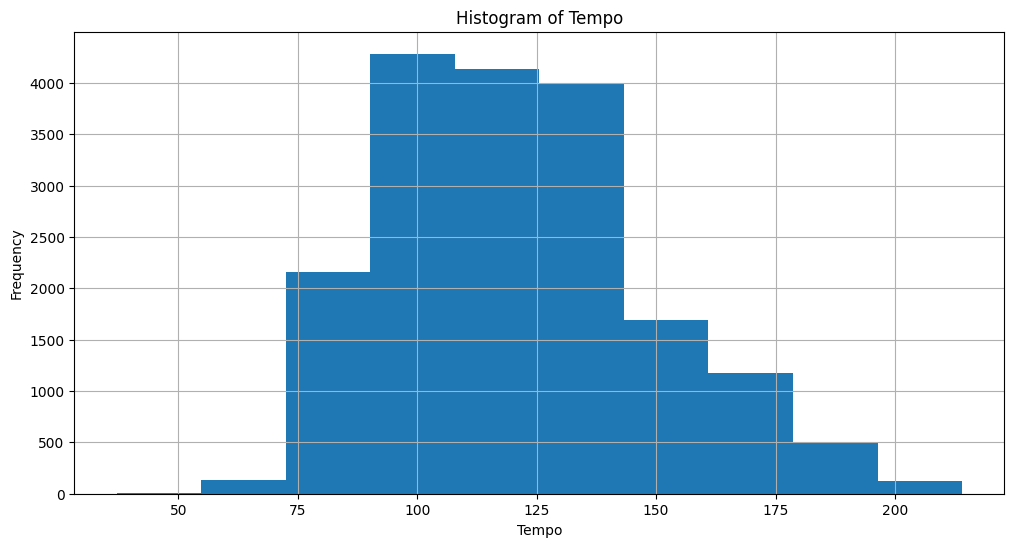

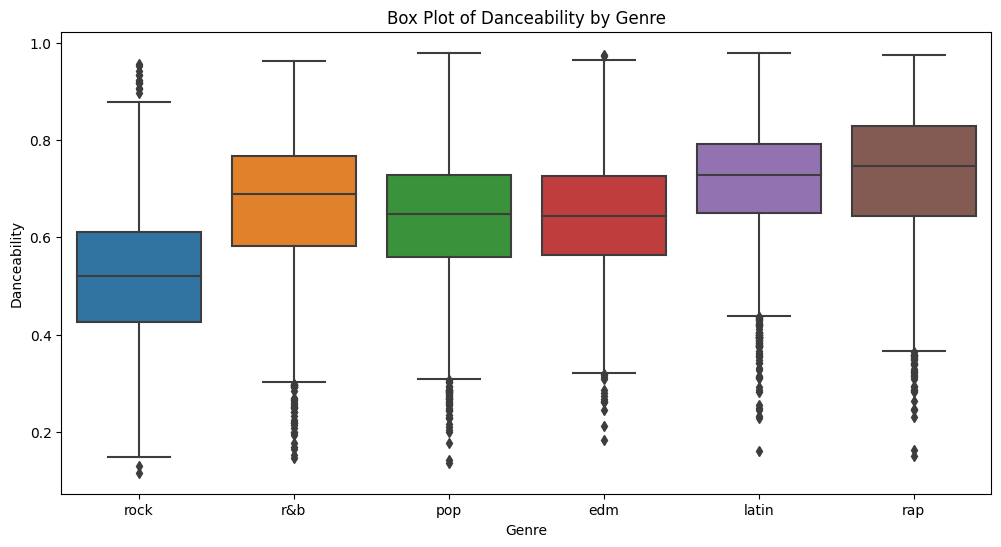

In [10]:
# Univariate visualizations
plt.figure(figsize=(12, 6))
data['tempo'].hist()
plt.title('Histogram of Tempo')
plt.xlabel('Tempo')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='playlist_genre', y='danceability', data=data)
plt.title('Box Plot of Danceability by Genre')
plt.xlabel('Genre')
plt.ylabel('Danceability')
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


<Figure size 1200x600 with 0 Axes>

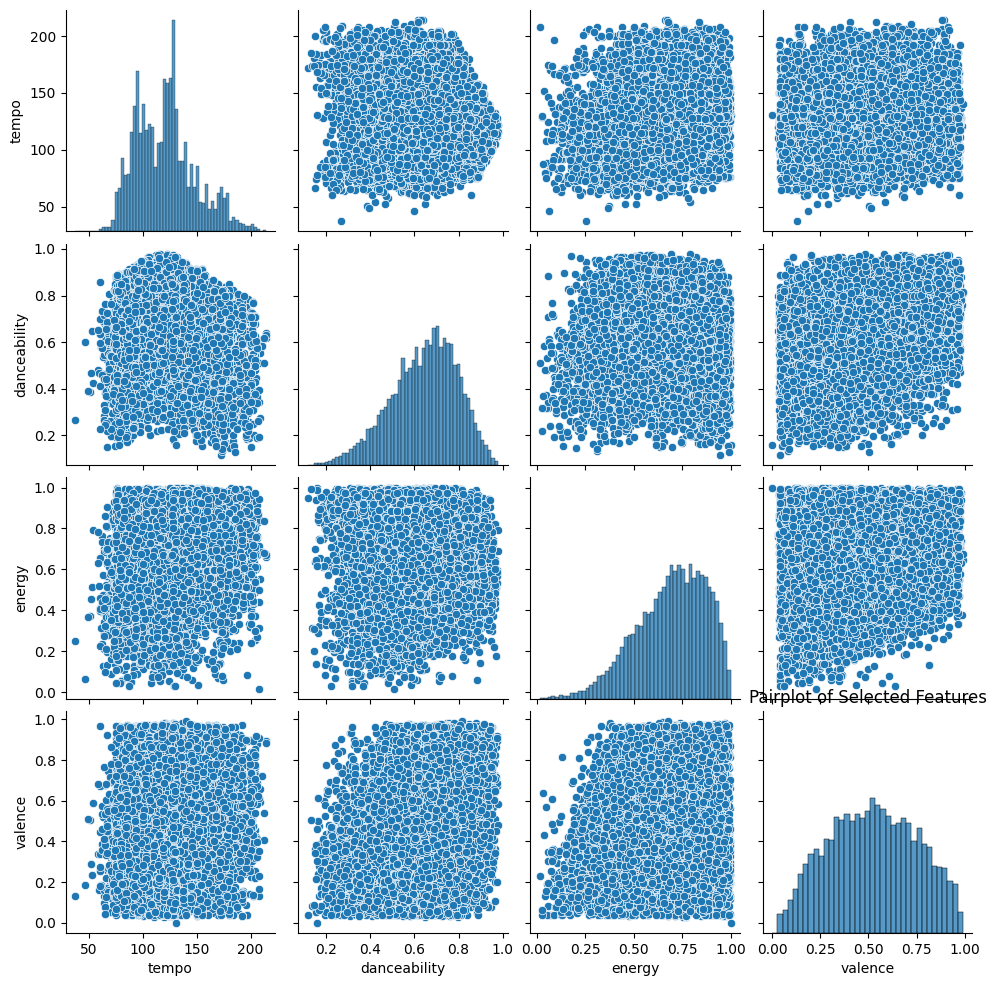

In [11]:
# Multivariate visualizations
plt.figure(figsize=(12, 6))
sns.pairplot(data[['tempo', 'danceability', 'energy', 'valence']])
plt.title('Pairplot of Selected Features')
plt.show()


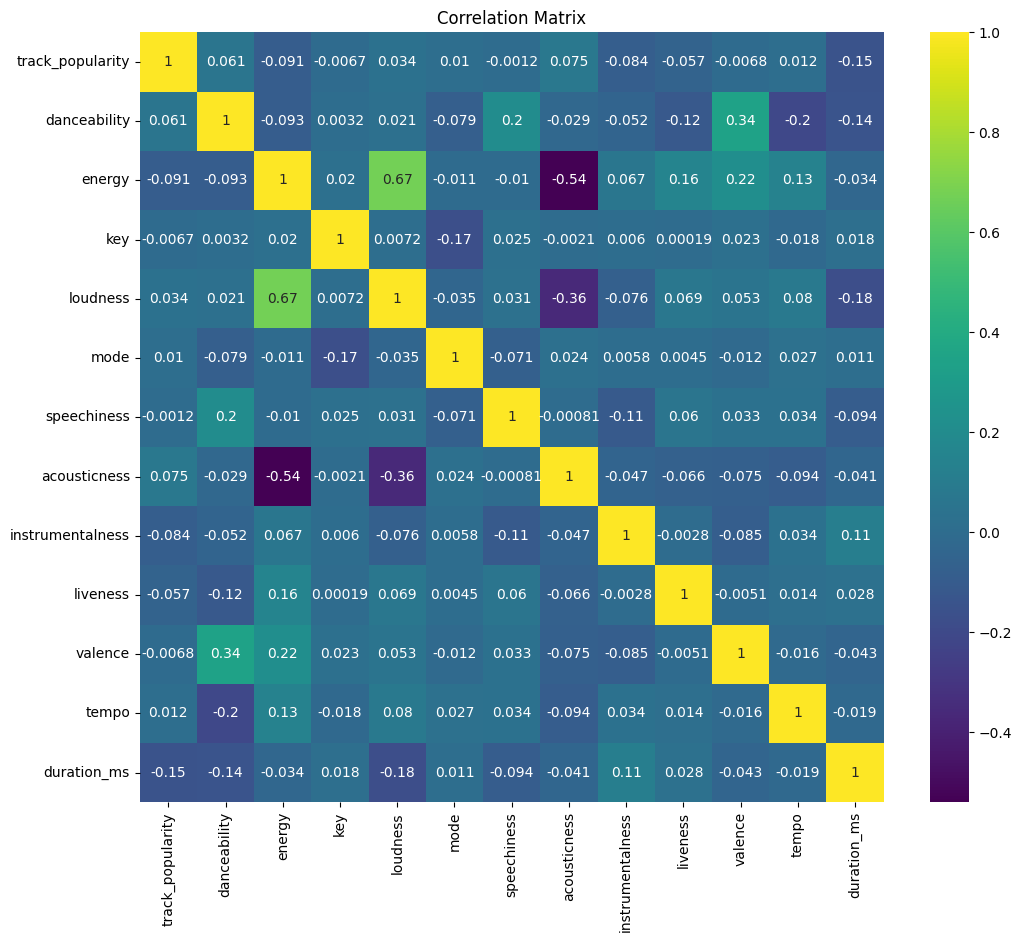

In [12]:
# Correlations
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.


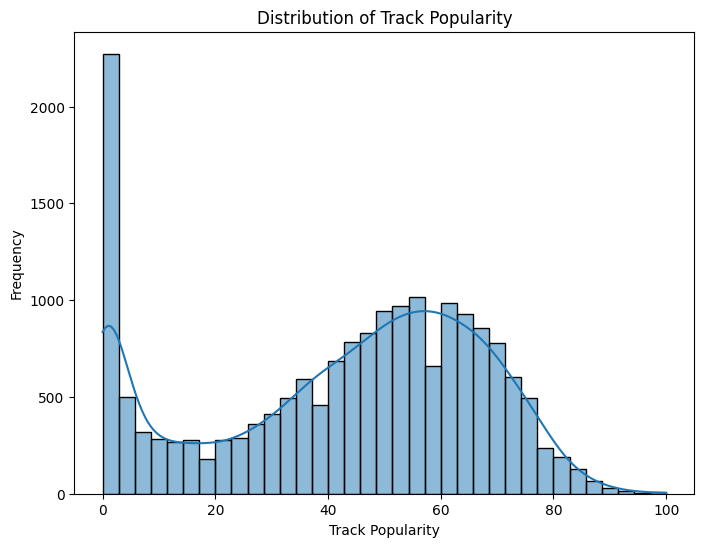

In [13]:
# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['track_popularity'], kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Track Popularity')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Data Preprocessing
# Handle missing values (if any)
data = data.dropna()

In [15]:
# Feature Engineering
data['tempo_log'] = np.log(data['tempo'])
data['duration_log'] = np.log(data['duration_ms'])
data['danceability_squared'] = data['danceability'] ** 2
data['energy_squared'] = data['energy'] ** 2
data['instrumentalness_log'] = np.log(data['instrumentalness'] + 1e-6)  # Add a small constant to avoid log(0)
data['speechiness_log'] = np.log(data['speechiness'] + 1e-6)
data['genre'] = data['playlist_genre'].str.split(',').str[0]  # Extract the first genre

In [16]:
selected_features = ['energy', 'loudness', 'valence', 'duration_ms', 'tempo_log', 'duration_log', 'danceability_squared', 'energy_squared', 'instrumentalness_log', 'speechiness_log']
X = data[selected_features]
y = data['track_popularity']

In [17]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# One-hot encode the 'genre' feature
genre_encoder = OneHotEncoder()
X_genre_encoded = genre_encoder.fit_transform(data[['genre']]).toarray()

# Combine the encoded 'genre' feature with the other features
X = np.hstack((X_scaled, X_genre_encoded))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Feature Selection
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=10, step=1)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

In [20]:
# Hyperparameter Tuning
# Linear Regression
lr_model = Ridge()
lr_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lr_grid = GridSearchCV(lr_model, lr_params, cv=5, scoring='r2')
lr_grid.fit(X_train_rfe, y_train)
lr_model = lr_grid.best_estimator_

In [21]:
# Decision Tree Regression
dt_model = DecisionTreeRegressor(random_state=42)
dt_params = {'max_depth': [3, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 5]}
dt_grid = GridSearchCV(dt_model, dt_params, cv=5, scoring='r2')
dt_grid.fit(X_train_rfe, y_train)
dt_model = dt_grid.best_estimator_

In [22]:
# Random Forest Regression
rf_model = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 20], 'max_features': [0.5, 0.75, 1.0]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train_rfe, y_train)
rf_model = rf_grid.best_estimator_

In [23]:
# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(random_state=42)
gb_params = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.05, 0.1]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='r2')
gb_grid.fit(X_train_rfe, y_train)
gb_model = gb_grid.best_estimator_

In [24]:
# Support Vector Regression
svm_model = SVR(kernel='rbf')
svm_params = {'C': [1, 10, 100], 'gamma': ['scale', 'auto']}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='r2')
svm_grid.fit(X_train_rfe, y_train)
svm_model = svm_grid.best_estimator_

In [25]:
# Neural Network Regression
nn_model = MLPRegressor(random_state=42, max_iter=1000)
nn_params = {'hidden_layer_sizes': [(32,), (64,)], 'alpha': [0.0001, 0.001, 0.01], 'learning_rate_init': [0.001, 0.01, 0.1]}
nn_grid = GridSearchCV(nn_model, nn_params, cv=5, scoring='r2')
nn_grid.fit(X_train_rfe, y_train)
nn_model = nn_grid.best_estimator_

In [26]:
# Evaluate the models
models = {
    'Linear Regression': lr_model,
    'Decision Tree Regression': dt_model,
    'Random Forest Regression': rf_model,
    'Gradient Boosting Regression': gb_model,
    'Support Vector Regression': svm_model,
    'Neural Network Regression': nn_model
}

for name, model in models.items():
    y_pred = model.predict(X_test_rfe)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-squared: {r2:.2f}")
    print()

Linear Regression:
MSE: 582.10
MAE: 20.20
R-squared: 0.04

Decision Tree Regression:
MSE: 599.72
MAE: 20.45
R-squared: 0.01

Random Forest Regression:
MSE: 578.23
MAE: 20.05
R-squared: 0.05

Gradient Boosting Regression:
MSE: 577.43
MAE: 20.08
R-squared: 0.05

Support Vector Regression:
MSE: 602.73
MAE: 19.62
R-squared: 0.01

Neural Network Regression:
MSE: 578.80
MAE: 20.08
R-squared: 0.05



In [27]:
# Cross-Validation
print("Cross-Validation Scores:")
kf = KFold(n_splits=5, random_state=42, shuffle=True)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')
    print(f"{name}: {cv_scores.mean():.4f}")


Cross-Validation Scores:
Linear Regression: 0.0472
Decision Tree Regression: 0.0297
Random Forest Regression: 0.0531
Gradient Boosting Regression: 0.0563
Support Vector Regression: 0.0192
Neural Network Regression: 0.0564


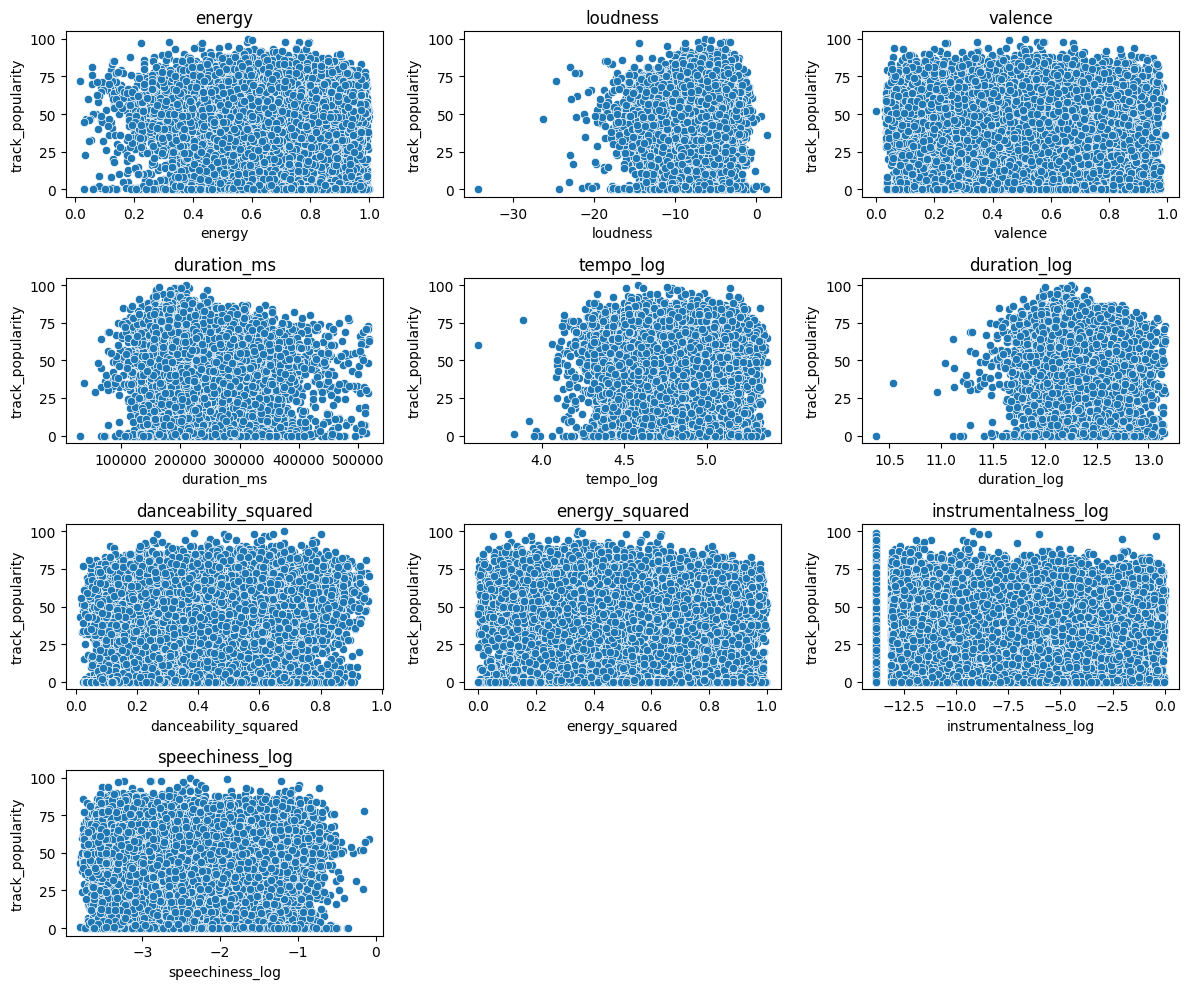

In [28]:
# Scatter plots of features vs target
num_features = len(selected_features)
num_rows = (num_features + 2) // 3
num_cols = min(3, num_features)
plt.figure(figsize=(12, 10))
for i, col in enumerate(selected_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(x=col, y='track_popularity', data=data)
    plt.title(col)
plt.tight_layout()
plt.show()

In [29]:
voting_model = VotingRegressor(estimators=[
    ('linear', lr_model),
    ('dt', dt_model),
    ('rf', rf_model),
    ('gb', gb_model),
    ('svm', svm_model),
    ('nn', nn_model)
])

stacking_model = StackingRegressor(
    estimators=[
        ('linear', lr_model),
        ('dt', dt_model),
        ('rf', rf_model),
        ('gb', gb_model),
        ('svm', svm_model),
        ('nn', nn_model)
    ],
    final_estimator=LinearRegression()
)

voting_model.fit(X_train_rfe, y_train)
stacking_model.fit(X_train_rfe, y_train)

y_pred_voting = voting_model.predict(X_test_rfe)
y_pred_stacking = stacking_model.predict(X_test_rfe)

voting_mse = mean_squared_error(y_test, y_pred_voting)
voting_mae = mean_absolute_error(y_test, y_pred_voting)
voting_r2 = r2_score(y_test, y_pred_voting)

stacking_mse = mean_squared_error(y_test, y_pred_stacking)
stacking_mae = mean_absolute_error(y_test, y_pred_stacking)
stacking_r2 = r2_score(y_test, y_pred_stacking)

print("\nVoting Regressor:")
print(f"MSE: {voting_mse:.2f}")
print(f"MAE: {voting_mae:.2f}")
print(f"R-squared: {voting_r2:.2f}")

print("\nStacking Regressor:")
print(f"MSE: {stacking_mse:.2f}")
print(f"MAE: {stacking_mae:.2f}")
print(f"R-squared: {stacking_r2:.2f}")



Voting Regressor:
MSE: 576.75
MAE: 19.94
R-squared: 0.05

Stacking Regressor:
MSE: 573.65
MAE: 20.00
R-squared: 0.06


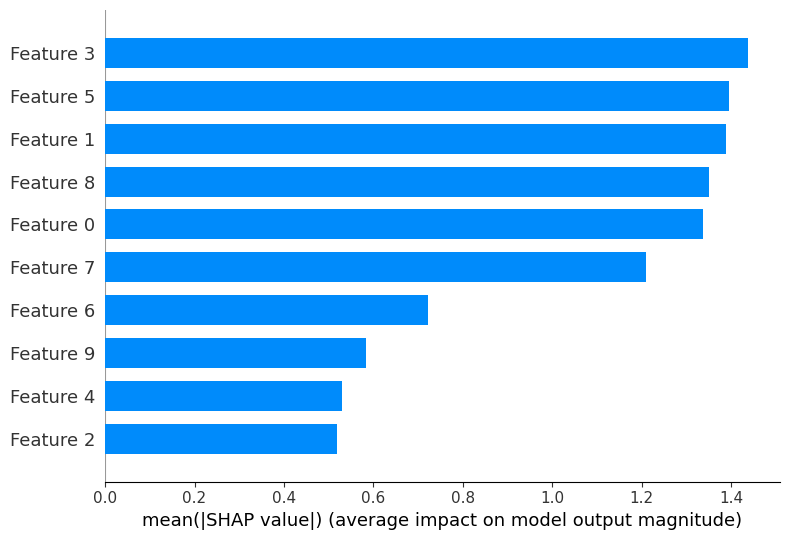

In [30]:
# Visualize SHAP Values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_rfe)
shap.summary_plot(shap_values, X_test_rfe, plot_type="bar")
plt.show()